C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None

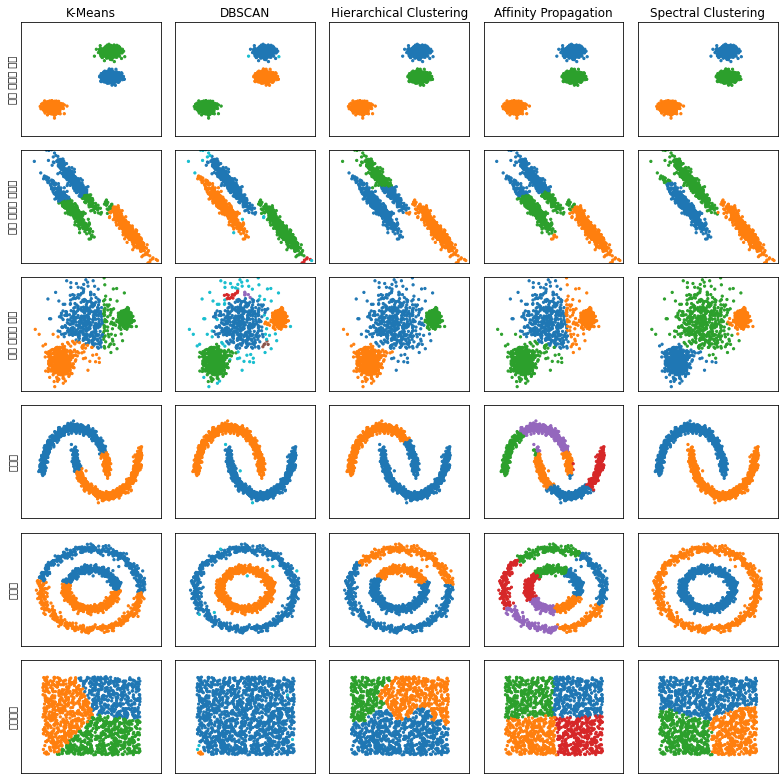

In [3]:
from sklearn.datasets import *
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.utils.testing import ignore_warnings
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
X, y = make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
no_structure = np.random.rand(n_samples, 2), None
datasets = {
    "같은 크기의 원형": blobs, 
    "같은 크기의 타원형": anisotropic, 
    "다른 크기의 원형": varied, 
    "초승달": noisy_moons, 
    "동심원": noisy_circles, 
    "비구조화": no_structure
}

plt.figure(figsize=(11, 11))
plot_num = 1
for i, (data_name, (X, y)) in enumerate(datasets.items()):
    if data_name in ["초승달", "동심원"]:
        n_clusters = 2
    else:
        n_clusters = 3

    X = StandardScaler().fit_transform(X)

    two_means = MiniBatchKMeans(n_clusters=n_clusters)
    dbscan = DBSCAN(eps=0.15)
    spectral = SpectralClustering(n_clusters=n_clusters, affinity="nearest_neighbors")
    ward = AgglomerativeClustering(n_clusters=n_clusters)
    affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
    clustering_algorithms = (
        ('K-Means', two_means),
        ('DBSCAN', dbscan),
        ('Hierarchical Clustering', ward),
        ('Affinity Propagation', affinity_propagation),
        ('Spectral Clustering', spectral),
    )

    for j, (name, algorithm) in enumerate(clustering_algorithms):
        with ignore_warnings(category=UserWarning):
            algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i == 0:
            plt.title(name)
        if j == 0:
            plt.ylabel(data_name)
        colors = plt.cm.tab10(np.arange(20, dtype=int))
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.tight_layout()
plt.show()

# 군집화의 성능 기준
- 조정 랜드 지수
- 조정 상호 정보량
- 실루엣 계수

### 랜드지수
- 랜드 지수를 구하기 위해서는 알고리즘이 정확하게 답을 맞췄는지 확인할 수 있는 정답이 있어야 한다
- 정답과 알고리즘의 결과가 맞으면 1, 아니면 0으로 지정

1. 정답과 알고리즘이 예측한 결과가 일치하는 경우
2. 정답은 맞았는데, 알고리즘이 실패한 경우

- 가능한 모든 갯수의 데이터에 대해 정답인 데이터의 갯수의 비율
- a : 전체 데이터 중 두 개의 데이터를 골랐을 때, 같은 군집의 데이터가 같은 군집의 데이터라고 분류가 되었을 경우
- b : 전체 데이터 중 두 개의 데이터를 골랐을 때, 다른 군집의 데이터가 다른 군집의 데이터라고 분류가 되었을 경우
- RI = a + b / nC_2(조합)
- 0~1 사이로 성능을 확인할 수 있지만, 무작위로 군집화를 해도 성능이 어느정도 나온다

In [9]:
#조합(콤비네이션 구하는 방법)
from itertools import combinations
combo = len(list(combinations(range(10),2))) #0~9 중에 2개를 고르는 경우의 수

45


### 조정 랜드지수(adjusted rand index)
ARI = RI - E[RI] / max(RI)  - E[RI]
- 무작위로 군집화를 하는 랜드지수의 기댓값을 원래의 값에서 빼서, 조정한 값이다
- 성능이 좋을 경우 1, 성능이 나쁘면 0이 나오지만 음수가 나오는 경우도 있다.

In [10]:
from sklearn.metrics.cluster import adjusted_rand_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


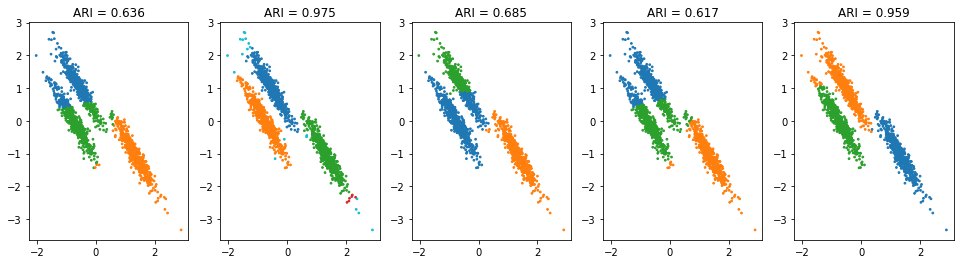

In [25]:
X, y = make_blobs(n_samples=n_samples, random_state=170)
# noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)

X, y = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)

plt.figure(figsize=(20,4))
count = 1
X = StandardScaler().fit_transform(X)
for i, algorithm in clustering_algorithms: #위에서 선언한 5개의 분류 알고리즘에 각각 데이터를 학습시키기
    algorithm.fit(X)
    
    #결과를 가지고 label로 만듬
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
    
    title = 'ARI = {:.3f}'.format(adjusted_rand_score(y, y_pred))
    
    #그래프를 그리기
    plt.subplot(1, len(datasets), count)
    plt.scatter(X[:, 0], X[:,1], s = 3, color = colors[y_pred])
    
    plt.title(title)
    count+=1



### 실루엣 계수
- 정답값이 없는 경우 군집화의 성능을 확인하기 위한 점수
- 모든 데이터 쌍(i,j)에 대해 거리를 구함
- a_i : i와 같은 군집에 속한 원소들의 평균 거리
- b_i : i와 다른 군집 중 가장 가까운 군집의 평균 거리

### 수식
b_i - a_i / max(a_i, b_i)
- 다른 군집의 평균 거리보다 내가 속한 군집의 평균 거리가 더 작으면 = 내 군집 간 다른 데이터들이 더 잘 뭉쳐있다 = 군집화가 잘 되어있다
- 다른 군집의 평균 거리보다 내가 속한 군집의 평균 거리가 더 크면 = 내 군집 간 다른 데이터들이 덜 뭉쳐있다 = 군집화가 잘 안되어있다
- 같은 군집의 데이터가 다른 군집의 데이터보다 더 가까우면 양수
- 같은 군집의 데이터가 다른 군집의 데이터보다 더 멀면 음수

= 실루엣 계수가 크면 클수록 좋은 군집화다

In [18]:
from sklearn.metrics import silhouette_samples

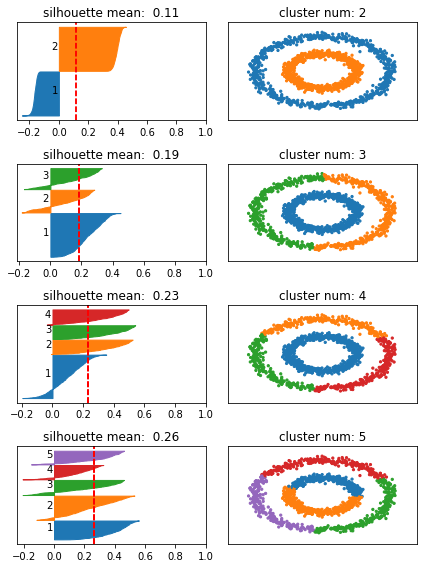

In [23]:
X = StandardScaler().fit_transform(noisy_circles[0]) #blobs[0]
colors = plt.cm.tab10(np.arange(20, dtype=int))
plt.figure(figsize=(6, 8))
for i in range(4):
    model = SpectralClustering(n_clusters=i + 2, affinity="nearest_neighbors")
    cluster_labels = model.fit_predict(X)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    silhouette_avg = sample_silhouette_values.mean()

    plt.subplot(4, 2, 2 * i + 1)
    y_lower = 10
    for j in range(i + 2):
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()
        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, jth_cluster_silhouette_values,
                          facecolor=colors[j], edgecolor=colors[j])
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j + 1))
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.yticks([])
        plt.title("silhouette mean: {:5.2f}".format(silhouette_avg))
        y_lower = y_upper + 10


    plt.subplot(4, 2, 2 * i + 2)
    plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[cluster_labels])
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.title("cluster num: {}".format(i + 2))

plt.tight_layout()
plt.show()